In [1]:
import pandas as pd 
import numpy as np 
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import seaborn as sns 

In [2]:
df = pd.read_excel(r'C:\Users\snapp\Desktop\AI\DF\Clustring Data.xlsx',sheet_name=0)
df.rename(columns={'ID':'ID',
                   'Most Ride city':'City',
                   'Rides':'Rides',
                   'Cancelled Requests By Driver%':'Cancellation',
                   'Average Rating':'Rate',
                   'Average Fare':'Average Fare',
                   'Boarded Day':'Boarded Day',
                  }, inplace = True)

In [3]:
df.head()

,ID,City,Rides,Cancellation,Rate,Average Fare,Boarded Day
0,2891556,THR,26,0.363636,4.846154,386923.076923,5
1,1464813,THR,4,0.100000,5.000000,365000.000000,1
2,1771104,THR,71,0.012500,4.681818,303591.549296,11
3,2131619,THR,136,0.125749,4.555556,406985.294118,13
4,3502098,THR,52,0.033898,4.571429,300480.769231,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264344 entries, 0 to 264343
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            264344 non-null  int64  
 1   City          262971 non-null  object 
 2   Rides         264344 non-null  int64  
 3   Cancellation  264344 non-null  float64
 4   Rate          264344 non-null  float64
 5   Average Fare  264344 non-null  float64
 6   Boarded Day   264344 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 14.1+ MB


In [5]:
df.describe()

,ID,Rides,Cancellation,Rate,Average Fare,Boarded Day
count,2.643440e+05,264344.000000,264344.000000,264344.000000,2.643440e+05,264344.000000
mean,1.853777e+06,39.170849,0.100795,4.713899,3.884834e+05,6.658869
std,1.278444e+06,50.012248,0.153597,0.450080,1.817455e+05,4.190381
min,9.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,5.704655e+05,6.000000,0.000000,4.600000,2.700000e+05,3.000000
50%,1.900984e+06,20.000000,0.056180,4.833333,3.650000e+05,6.000000
75%,3.029418e+06,53.000000,0.125000,5.000000,4.774495e+05,10.000000
max,3.863369e+06,760.000000,1.000000,5.000000,5.255000e+06,14.000000


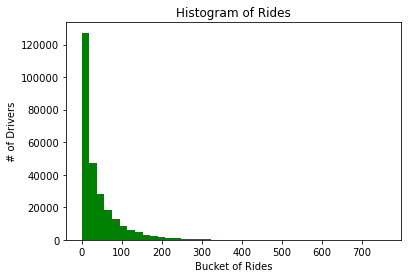

In [6]:
plt.hist(df['Rides'],bins = 40,color='g')
plt.ylabel('# of Drivers')
plt.xlabel('Bucket of Rides')
plt.title('Histogram of Rides')
plt.show()

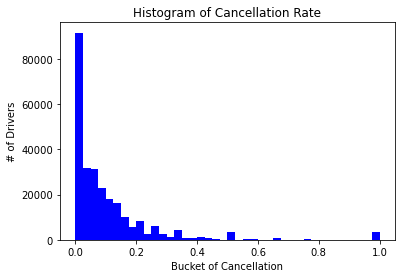

In [7]:
plt.hist(df['Cancellation'],bins = 40,color='b')
plt.ylabel('# of Drivers')
plt.xlabel('Bucket of Cancellation')
plt.title('Histogram of Cancellation Rate')
plt.show()

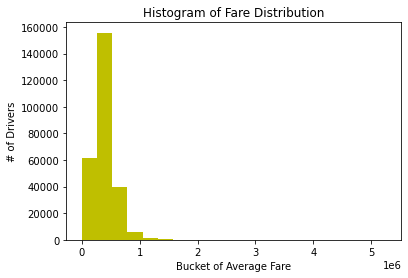

In [8]:
plt.hist(df['Average Fare'],bins = 20,color='y')
plt.ylabel('# of Drivers')
plt.xlabel('Bucket of Average Fare')
plt.title('Histogram of Fare Distribution')
plt.show()

In [9]:
df.drop(['City'],axis = 1,inplace = True)

In [10]:
#sns.heatmap(df,linewidth=0.5, annot=True, cmap='RdYlGn_r')

In [11]:
model = KMeans(n_clusters = 8)

In [12]:
Data = df[['Rides','Cancellation','Boarded Day']]
model = model.fit(scale(Data))

In [13]:
len(model.labels_)

264344

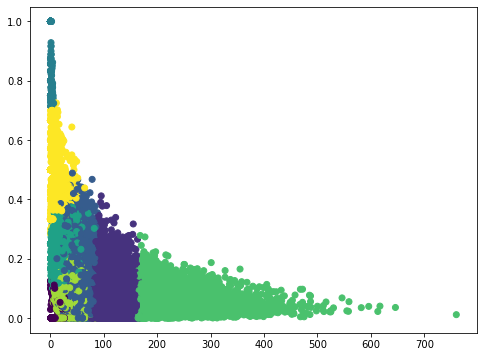

In [14]:
plt.figure(figsize =(8,6))
plt.scatter(Data.iloc[:,0],Data.iloc[:,1], c=model.labels_.astype(np.float))
plt.show()

In [15]:
df['Labels'] = model.labels_
df.groupby('Labels').agg({'ID':'count','Rides':'mean','Cancellation':'mean'})

,ID,Rides,Cancellation
Labels,,,
0,53083,46.396078,0.085783
1,55562,28.318275,0.058351
2,12469,4.272195,0.437690
3,8758,219.506280,0.051537
4,66130,6.480266,0.010200
5,3943,0.104235,0.978902
6,31471,111.970290,0.060928
7,32928,11.839225,0.197037


<AxesSubplot:>

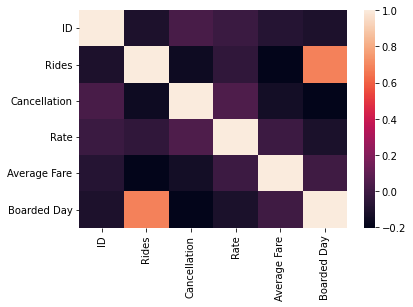

In [16]:
import seaborn as sns 
corr=df.corr()
sns.heatmap(corr)